In [1]:
# 파이토치 작동 확인
import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


2.6.0+cu126
True
NVIDIA GeForce RTX 2070


In [2]:
# 텐서 생성
print(torch.tensor([1, 2, 3]))
print(torch.tensor([[1, 2, 3], [4, 5, 6]]))
print(torch.LongTensor([1, 2, 3]))
print(torch.FloatTensor([1, 2, 3]))

tensor([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([1, 2, 3])
tensor([1., 2., 3.])


In [3]:
tensor = torch.rand(1, 2, device="cuda")
print(tensor)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

tensor([[0.8031, 0.3826]], device='cuda:0')
torch.Size([1, 2])
torch.float32
cuda:0


In [4]:
tensor = torch.rand(1, 2)
print(tensor)
print(tensor.shape)

tensor = tensor.reshape(2, 1) # 텐서 차원 변환
print(tensor)
print(tensor.shape)

tensor([[0.2089, 0.1014]])
torch.Size([1, 2])
tensor([[0.2089],
        [0.1014]])
torch.Size([2, 1])


In [5]:
# 텐서 자료형 설정
tensor = torch.rand((3, 3), dtype=torch.float)
print(tensor)

tensor([[0.7480, 0.0923, 0.2632],
        [0.6250, 0.1482, 0.5010],
        [0.2838, 0.8832, 0.1708]])


In [6]:
# 장치 설정
device = "cuda" if torch.cuda.is_available() else "cpu"
cpu = torch.FloatTensor([1, 2, 3])
gpu = torch.cuda.FloatTensor([1, 2, 3])
tensor = torch.rand((1, 1), device=device)
print(device)
print(cpu)
print(gpu)
print(tensor)

cuda
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([[0.0448]], device='cuda:0')


C:\Users\LCW\AppData\Local\Temp\ipykernel_572\2194115970.py:4: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\tensor\python_tensor.cpp:80.)
  gpu = torch.cuda.FloatTensor([1, 2, 3])


In [7]:
# 장치 변환환
cpu = torch.FloatTensor([1, 2, 3])
gpu = cpu.cuda()
gpu2cpu = gpu.cpu()
cpu2gpu = cpu.to("cuda")
print(cpu)
print(gpu)
print(gpu2cpu)
print(cpu2gpu)

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')


In [8]:
# 넘파이 배열 텐서 변환
import numpy as np

ndarray = np.array([1,2,3], dtype=np.uint8)
print(torch.tensor(ndarray))
print(torch.Tensor(ndarray))
print(torch.from_numpy(ndarray))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


In [9]:
# 텐서 넘파이 배열 변환
tensor = torch.cuda.FloatTensor([1,2,3])
ndarray = tensor.detach().cpu().numpy()
print(ndarray)
print(type(ndarray))

[1. 2. 3.]
<class 'numpy.ndarray'>


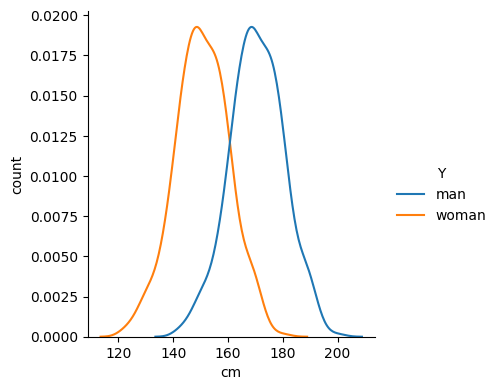

In [10]:
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

man_height = stats.norm.rvs(loc=170, scale=10, size=500, random_state=1)
woman_height = stats.norm.rvs(loc=150, scale=10, size=500, random_state=1)

X = np.concatenate([man_height, woman_height])
Y = ["man"] * len(man_height) + ["woman"] * len(woman_height)

df = pd.DataFrame(list(zip(X, Y)), columns=["X", "Y"])
fig = sns.displot(data=df, x="X", hue="Y", kind="kde", height=4)
fig.set_axis_labels("cm", "count")
plt.show()

In [11]:
statistic, pvalue = stats.ttest_ind(man_height, woman_height, equal_var=True)

print("statistic", statistic)
print("pvalue: ", pvalue)
print("*: ", pvalue < 0.05)
print("**: ", pvalue < 0.001)

statistic 31.96162891312776
pvalue:  6.2285854381989205e-155
*:  True
**:  True


In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 준비
x = np.array([[i] for i in range(1, 31)], dtype=np.float32)
y = np.array([[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
              [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
              [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]], dtype=np.float32)

# 데이터 정규화
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

# 파라미터 초기화
weight = np.random.randn() * 0.01  # 작은 랜덤값으로 초기화
bias = np.random.randn() * 0.01
learning_rate = 0.001  # 학습률 조정

# 학습 루프
epochs = 10000
for epoch in range(epochs):
    yh = weight * x + bias
    cost = ((y - yh) ** 2).mean()

    # 수동 경사 하강법 (flatten 추가)
    grad_w = -2 * ((y - yh).flatten() * x.flatten()).mean() # flatten() 2차원 배열의 브로드 캐스트를 방지하기 위해 1차원 배열로 변환
    grad_b = -2 * (y - yh).mean()

    weight -= learning_rate * grad_w
    bias -= learning_rate * grad_b

    # NaN 체크
    if np.isnan(weight) or np.isnan(bias):
        print(f"NaN detected at epoch {epoch + 1}! Stopping training.")
        break

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}. Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

Epoch : 1000. Weight : 0.856, Bias : -0.001, Cost : 0.041
Epoch : 2000. Weight : 0.970, Bias : -0.000, Cost : 0.023
Epoch : 3000. Weight : 0.986, Bias : -0.000, Cost : 0.023
Epoch : 4000. Weight : 0.988, Bias : -0.000, Cost : 0.023
Epoch : 5000. Weight : 0.988, Bias : -0.000, Cost : 0.023
Epoch : 6000. Weight : 0.988, Bias : -0.000, Cost : 0.023
Epoch : 7000. Weight : 0.988, Bias : -0.000, Cost : 0.023
Epoch : 8000. Weight : 0.988, Bias : -0.000, Cost : 0.023
Epoch : 9000. Weight : 0.988, Bias : -0.000, Cost : 0.023
Epoch : 10000. Weight : 0.988, Bias : -0.000, Cost : 0.023


In [13]:
import torch
from torch import optim

x = torch.FloatTensor([[i] for i in range(1, 31)])
y = torch.FloatTensor([[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
              [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
              [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 2000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 3000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 4000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 5000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 6000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 7000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch : 8000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.432, Cost : 1.372


In [ ]:
import torch
from torch import optim

x = torch.FloatTensor([[i] for i in range(1, 31)])
y = torch.FloatTensor([[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
              [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
              [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(2):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)

    print(f"Epoch : {epoch+1:4d}")
    print(f"Step [1] : Gradiant : {weight.grad}, Weight : {weight.item():.5f}")
    optimizer.zero_grad()
    print(f"Step [2] : Gradiant : {weight.grad}, Weight : {weight.item():.5f}")
    cost.backward()
    print(f"Step [3] : Gradiant : {weight.grad}, Weight : {weight.item():.5f}")
    optimizer.step()
    print(f"Step [4] : Gradiant : {weight.grad}, Weight : {weight.item():.5f}")

Epoch :    1
Step [1] : Gradiant : None, Weight : 0.00000
Step [2] : Gradiant : None, Weight : 0.00000
Step [3] : Gradiant : tensor([-540.4854]), Weight : 0.00000
Step [4] : Gradiant : tensor([-540.4854]), Weight : 0.54049
Epoch :    2
Step [1] : Gradiant : tensor([-540.4854]), Weight : 0.54049
Step [2] : Gradiant : None, Weight : 0.54049
Step [3] : Gradiant : tensor([-198.9818]), Weight : 0.54049
Step [4] : Gradiant : tensor([-198.9818]), Weight : 0.73947


In [3]:
import torch
from torch import nn
from torch import optim

x = torch.FloatTensor([[i] for i in range(1, 31)])
y = torch.FloatTensor([[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
              [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
              [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]])

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10000):
    output = model(x)
    cost = criterion(output, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.8538]], requires_grad=True), Parameter containing:
tensor([0.0732], requires_grad=True)], Cost : 1.434
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8633]], requires_grad=True), Parameter containing:
tensor([-0.1191], requires_grad=True)], Cost : 1.396
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8692]], requires_grad=True), Parameter containing:
tensor([-0.2388], requires_grad=True)], Cost : 1.381
Epoch : 4000, Model : [Parameter containing:
tensor([[0.8729]], requires_grad=True), Parameter containing:
tensor([-0.3133], requires_grad=True)], Cost : 1.376
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8751]], requires_grad=True), Parameter containing:
tensor([-0.3596], requires_grad=True)], Cost : 1.374
Epoch : 6000, Model : [Parameter containing:
tensor([[0.8766]], requires_grad=True), Parameter containing:
tensor([-0.3884], requires_grad=True)], Cost : 1.373
Epoch : 7000, Model : [Parameter containi

In [4]:
class Dataset:
    def __init__(self, data, *arg, **kwargs):
        self.data = data
    
    def __getitem__(self, index):
        return tuple(data[index] for data in self.data.tensor)
    
    def __len__(self):
        return self.data[0].size(0)

In [7]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

train_x = torch.FloatTensor([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
train_y = torch.FloatTensor([[0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]])

train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

model = nn.Linear(2, 2, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(20000):
    cost = 0.0
    for batch in train_dataloader:
        x, y = batch
        output = model(x)

        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[ 1.1276, -0.3292],
        [ 0.7359,  0.5364]], requires_grad=True), Parameter containing:
tensor([-0.0430, -0.2200], requires_grad=True)], Cost : 0.019
Epoch : 2000, Model : [Parameter containing:
tensor([[ 1.2308, -0.3826],
        [ 0.7640,  0.5219]], requires_grad=True), Parameter containing:
tensor([-0.1995, -0.2626], requires_grad=True)], Cost : 0.005
Epoch : 3000, Model : [Parameter containing:
tensor([[ 1.2834, -0.4097],
        [ 0.7783,  0.5145]], requires_grad=True), Parameter containing:
tensor([-0.2792, -0.2843], requires_grad=True)], Cost : 0.001
Epoch : 4000, Model : [Parameter containing:
tensor([[ 1.3101, -0.4236],
        [ 0.7856,  0.5107]], requires_grad=True), Parameter containing:
tensor([-0.3199, -0.2954], requires_grad=True)], Cost : 0.000
Epoch : 5000, Model : [Parameter containing:
tensor([[ 1.3238, -0.4306],
        [ 0.7893,  0.5088]], requires_grad=True), Parameter containing:
tensor([-0.3406, -0.3010], 

In [8]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

train_x = torch.FloatTensor([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
train_y = torch.FloatTensor([[0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]])

train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

model = nn.Linear(2, 2, bias=False)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(20000):
    cost = 0.0
    for batch in train_dataloader:
        x, y = batch
        output = model(x)

        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.5344, 0.1429],
        [0.8003, 0.4424]], requires_grad=True)], Cost : 0.092
Epoch : 2000, Model : [Parameter containing:
tensor([[ 0.7735, -0.0508],
        [ 0.8618,  0.3926]], requires_grad=True)], Cost : 0.058
Epoch : 3000, Model : [Parameter containing:
tensor([[ 0.9638, -0.2044],
        [ 0.9107,  0.3531]], requires_grad=True)], Cost : 0.037
Epoch : 4000, Model : [Parameter containing:
tensor([[ 1.1149, -0.3267],
        [ 0.9496,  0.3217]], requires_grad=True)], Cost : 0.023
Epoch : 5000, Model : [Parameter containing:
tensor([[ 1.2350, -0.4239],
        [ 0.9805,  0.2967]], requires_grad=True)], Cost : 0.015
Epoch : 6000, Model : [Parameter containing:
tensor([[ 1.3304, -0.5012],
        [ 1.0050,  0.2768]], requires_grad=True)], Cost : 0.009
Epoch : 7000, Model : [Parameter containing:
tensor([[ 1.4063, -0.5624],
        [ 1.0245,  0.2611]], requires_grad=True)], Cost : 0.006
Epoch : 8000, Model : [Parameter containing:


In [10]:
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        y = F.relu(self.conv2(x))
        return x

In [ ]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y
    
    def __len__(self):
        return self.length

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)
    
    def forward(self, x):
        x = self.layer(x)
        return x

ImportError: cannot import name 'Dataset' from 'torch.utils' (c:\Users\LCW\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\__init__.py)